In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
#CLEANING NULL VALUES

In [4]:
df = pd.read_csv('./iris-data.csv')
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [8]:
# drop rows

df_clean = df.dropna()
df_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
#ENCODING

In [10]:
col = ['class']
df_col = df_clean[col]
df_col

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [11]:
df_col['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [12]:
#One-hot encoding

df_one_hot_ecoding = pd.get_dummies(df_clean,
                                   columns=['class'],
                                   drop_first=True)
df_one_hot_ecoding

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setossa,class_Iris-versicolor,class_Iris-virginica,class_versicolor
0,5.1,3.5,1.4,0.2,0,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1,0
146,6.3,2.5,5.0,2.3,0,0,1,0
147,6.5,3.0,5.2,2.0,0,0,1,0
148,6.2,3.4,5.4,2.3,0,0,1,0


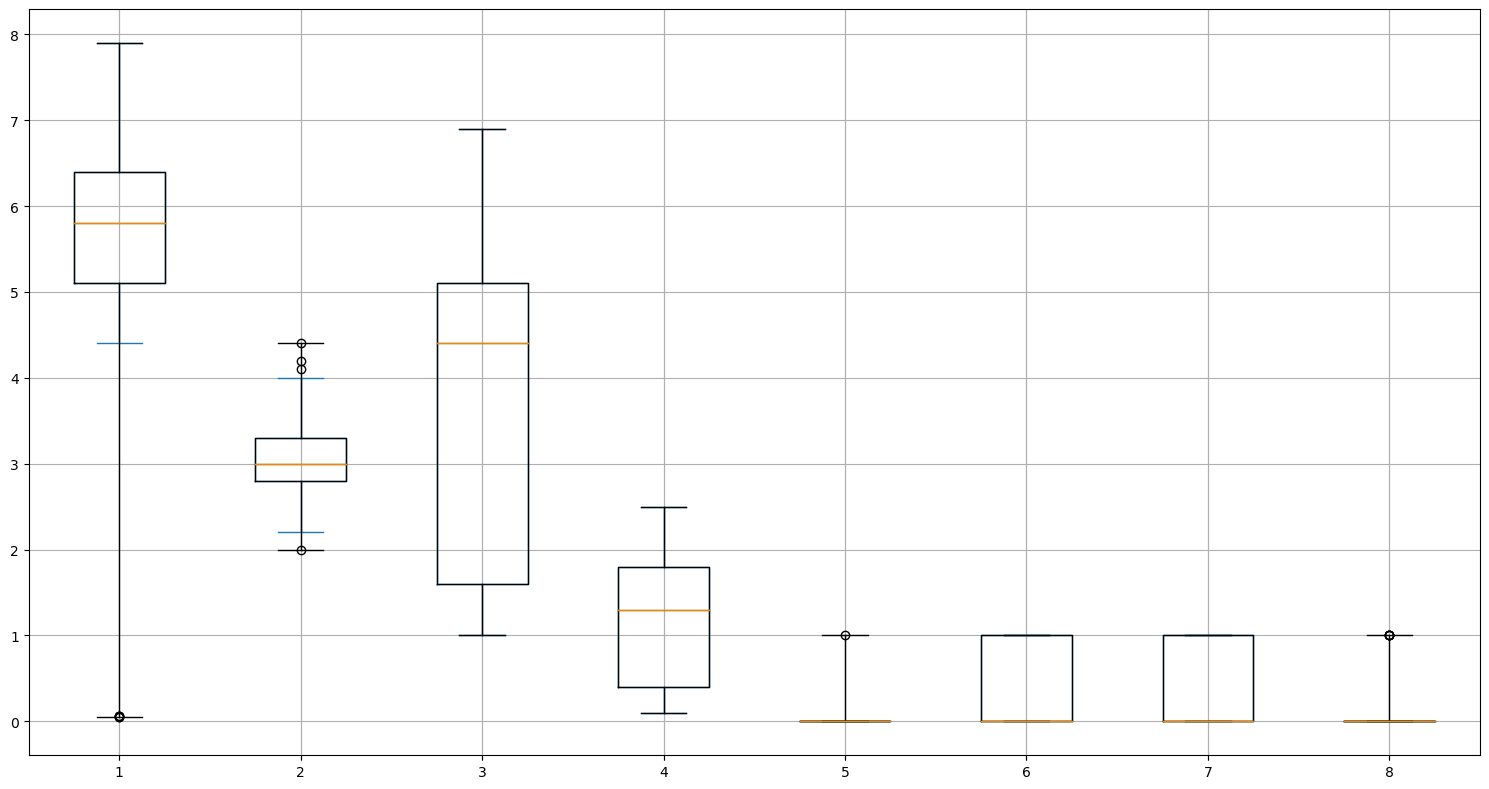

In [13]:
# Boxplot analysis

data = df_one_hot_ecoding
ax = data.plot.box(figsize=(15, 8))
#ax.set_ylabel('sepal_length_cm')
ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()

In [14]:
#Incluyo SCALING para probar 



In [ ]:
# Using scikit-learn .MinMaxScaler()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sample_data)
scaled_data
array([[0.27117366, 1.        ],
       [0.4722292 , 0.        ],
       [0.32143755, 1.        ],
       ...,
       [       nan, 1.        ],
       [0.32143755, 0.        ],
       [0.39683338, 1.        ]])
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Pclass'])
scaled_df.describe()